In [3]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os, glob

def read_csv_folder(path):
    files = glob.glob(os.path.join(path,'*.csv'))
    files.sort()
    l=[]
    for f in files:
        l.append(pd.read_csv(f))
    return pd.concat(l,axis=0, ignore_index=True)

In [5]:
ram=read_csv_folder("../data/snmplabo/memory")
ram['datetime']= mdates.num2date(mdates.datestr2num(ram['datetime']))
ram.head(5)



,datetime,rm,ru,rf,rs,rb,sz,ss,cm
0,2023-05-05 08:40:01+00:00,4046680,464300,3736016,201800,56,4063228,3271716,1108712
1,2023-05-05 08:45:02+00:00,4046680,461548,3733404,201800,56,4063228,3271856,1109004
2,2023-05-05 08:50:01+00:00,4046680,460680,3732536,201800,56,4063228,3271856,1109332
3,2023-05-05 08:55:01+00:00,4046680,538736,3810656,209992,56,4063228,3271920,1118020
4,2023-05-05 09:00:01+00:00,4046680,769340,4041368,209992,56,4063228,3272028,1118700


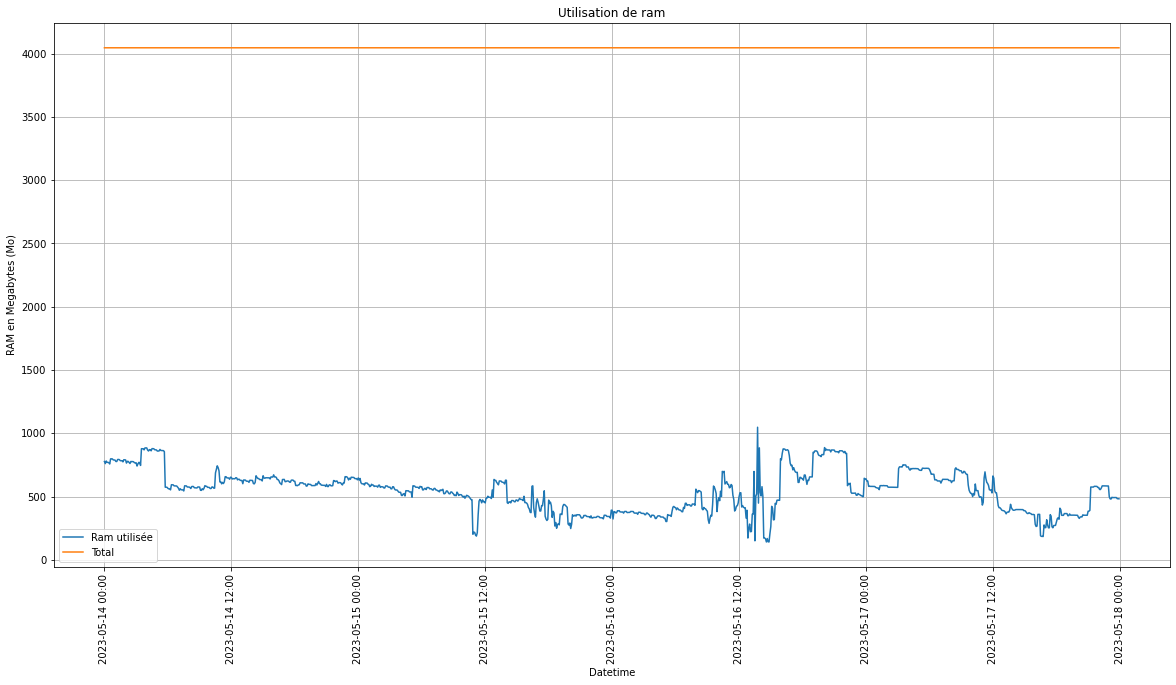

In [18]:
# Valeur à modifier pour zoomer en deux dates 
# Les données sont entre 2023-05-05 et 2023-05-23
date1 = mdates.num2date(mdates.datestr2num("2023-05-14")) 
date2 = mdates.num2date(mdates.datestr2num("2023-05-18"))

sram=ram[(ram["datetime"] >= date1) & (ram["datetime"] <= date2)]
dates = sram['datetime']

n=1e3 
plt.figure(figsize=(20,10))
plt.plot(dates,sram['ru']/n)
plt.plot(dates,sram['rm']/n)
plt.legend(["Ram utilisée","Total"])
plt.xticks(rotation="vertical")
plt.title("Utilisation de ram")
plt.xlabel("Datetime")
plt.ylabel("RAM en Megabytes (Mo)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%F %H:%M'))
plt.grid(visible=True)
plt.show()



